In [3]:
# Import tools, read in data from API, and put into Pandas dataframe
import pandas as pd
import json, requests

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [7]:
url = "http://magic-stocks.herokuapp.com/api/v1/metrics/usb"
response = requests.get(url).json()
df = pd.DataFrame(response)

In [8]:
del df['adj_close']
del df['dividend']
del df['high']
del df['id']
del df['low']
del df['open_amt']
del df['rsi']
del df['slowd']
del df['slowk']
del df['split']
del df['std']
del df['roc']
del df['ticker']
del df['volume']
del df['willr']
del df['date']
del df['next_close']

In [22]:
df['direction'] = df['direction'].replace({-1: 0})
df = df[['close', 'sma', 'direction']]

In [23]:
df.head()

,close,sma,direction
0,23.91,22.9093,0
1,23.77,22.9164,1
2,24.43,22.9793,0
3,24.14,23.0514,1
4,24.40,23.1793,0


In [24]:
X = df[['close', 'sma']].to_numpy()
y = df['direction'].to_numpy()

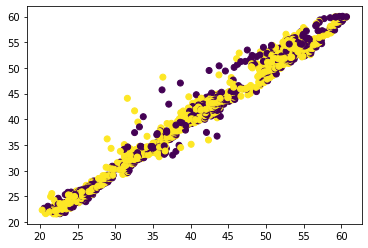

In [25]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [28]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [29]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5227754237288136
Testing Data Score: 0.49682539682539684


IndexError: too many indices for array

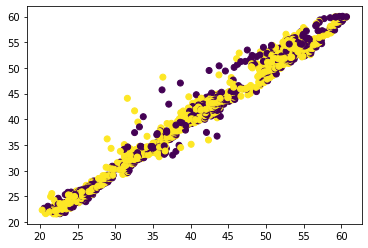

In [30]:
# Generate a new data point (the red circle)
import numpy as np
new_data = df.iloc[0, 0:2].to_numpy()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [31]:
predictions[0]

1

In [32]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (trending down) or 1 (trending up)")
print(f"The new point was classified as: {predictions}")

ValueError: Expected 2D array, got 1D array instead:
array=[23.91   22.9093].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
625,1,0
626,1,1
627,1,0
628,1,1
